In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from create_matrix import *
import os
import sys
from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
from sklearn.model_selection import train_test_split, KFold
from common import compute_rmse_fraction
from common import compute_rmse

appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}
APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
year = 2014
n_splits = 10
case=2
a=2
cost='abs'

In [2]:
def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [3]:
region = "SanDiego"
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
region = "Austin"
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [4]:
def load_obj(name):
    with open(os.path.expanduser('~/git/data/' + name + '.pkl'), 'rb') as f:
        return pickle.load(f)

In [47]:
import pickle
pred = {}
for method in ['normal', 'transfer']:
    pred[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        pred[method][algo] = {}
        for cost in['abs', 'rel']:
            pred[method][algo][cost] = {}
            for a in [2, 3]:
                pred[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    lr = float(lr)
                    pred[method][algo][cost][a][lr] = {}
                    for random_seed in range(10):
                        print method, algo, cost, a, lr, random_seed
                        pred[method][algo][cost][a][lr][random_seed] = load_obj('pred/pred_' + method + '_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr)
                                                                               + '_' + str(random_seed))

normal adagrad abs 2 0.01 0
normal adagrad abs 2 0.01 1
normal adagrad abs 2 0.01 2
normal adagrad abs 2 0.01 3
normal adagrad abs 2 0.01 4
normal adagrad abs 2 0.01 5
normal adagrad abs 2 0.01 6
normal adagrad abs 2 0.01 7
normal adagrad abs 2 0.01 8
normal adagrad abs 2 0.01 9
normal adagrad abs 2 0.1 0
normal adagrad abs 2 0.1 1
normal adagrad abs 2 0.1 2
normal adagrad abs 2 0.1 3
normal adagrad abs 2 0.1 4
normal adagrad abs 2 0.1 5
normal adagrad abs 2 0.1 6
normal adagrad abs 2 0.1 7
normal adagrad abs 2 0.1 8
normal adagrad abs 2 0.1 9
normal adagrad abs 2 1.0 0
normal adagrad abs 2 1.0 1
normal adagrad abs 2 1.0 2
normal adagrad abs 2 1.0 3
normal adagrad abs 2 1.0 4
normal adagrad abs 2 1.0 5
normal adagrad abs 2 1.0 6
normal adagrad abs 2 1.0 7
normal adagrad abs 2 1.0 8
normal adagrad abs 2 1.0 9
normal adagrad abs 2 10.0 0
normal adagrad abs 2 10.0 1
normal adagrad abs 2 10.0 2
normal adagrad abs 2 10.0 3
normal adagrad abs 2 10.0 4
normal adagrad abs 2 10.0 5
normal adagr

In [49]:
import pickle
out = {}
for method in ['normal', 'transfer']:
    out[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        out[method][algo] = {}
        for cost in['abs', 'rel']:
            out[method][algo][cost] = {}
            for a in [2, 3]:
                out[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    lr = float(lr)
                    print method, algo, cost, a, lr
                    out[method][algo][cost][a][lr] = load_obj('out/out_' + method + '_' + algo + '_'
                                                                               + cost + '_' + str(a) + '_' + str(lr))

normal adagrad abs 2 0.01
normal adagrad abs 2 0.1
normal adagrad abs 2 1.0
normal adagrad abs 2 10.0
normal adagrad abs 2 100.0
normal adagrad abs 3 0.01
normal adagrad abs 3 0.1
normal adagrad abs 3 1.0
normal adagrad abs 3 10.0
normal adagrad abs 3 100.0
normal adagrad rel 2 0.01
normal adagrad rel 2 0.1
normal adagrad rel 2 1.0
normal adagrad rel 2 10.0
normal adagrad rel 2 100.0
normal adagrad rel 3 0.01
normal adagrad rel 3 0.1
normal adagrad rel 3 1.0
normal adagrad rel 3 10.0
normal adagrad rel 3 100.0
normal gd abs 2 0.01
normal gd abs 2 0.1
normal gd abs 2 1.0
normal gd abs 2 10.0
normal gd abs 2 100.0
normal gd abs 3 0.01
normal gd abs 3 0.1
normal gd abs 3 1.0
normal gd abs 3 10.0
normal gd abs 3 100.0
normal gd rel 2 0.01
normal gd rel 2 0.1
normal gd rel 2 1.0
normal gd rel 2 10.0
normal gd rel 2 100.0
normal gd rel 3 0.01
normal gd rel 3 0.1
normal gd rel 3 1.0
normal gd rel 3 10.0
normal gd rel 3 100.0
normal gd_decay abs 2 0.01
normal gd_decay abs 2 0.1
normal gd_decay

In [50]:
mean_out = {}
for method in ['normal', 'transfer']:
    mean_out[method] = {}
    for algo in ['adagrad', 'gd', 'gd_decay']:
        mean_out[method][algo] = {}
        for cost in ['abs', 'rel']:
            mean_out[method][algo][cost] = {}
            for a in [2, 3]:
                mean_out[method][algo][cost][a] = {}
                for lr in [0.01, 0.1, 1, 10, 100]:
                    mean_out[method][algo][cost][a][lr] = pd.Panel(out[method][algo][cost][a][lr]).mean(axis=0)

In [51]:
# test = {}
for method in ['normal', 'transfer']:
    for algo in ['adagrad', 'gd', 'gd_decay']:
        for cost in ['abs', 'rel']:
            for a in [2, 3]:
                for lr in [0.01, 0.1, 1, 10, 100]:
                    mean_out[method][algo][cost][a][lr] = mean_out[method][algo][cost][a][lr].rename(
                                                columns = {'dw': "dw_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'wm': "wm_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'mw': "mw_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'oven': "oven_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'fridge': "fridge_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr),
                                                          'hvac': "hvac_" + method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr)})

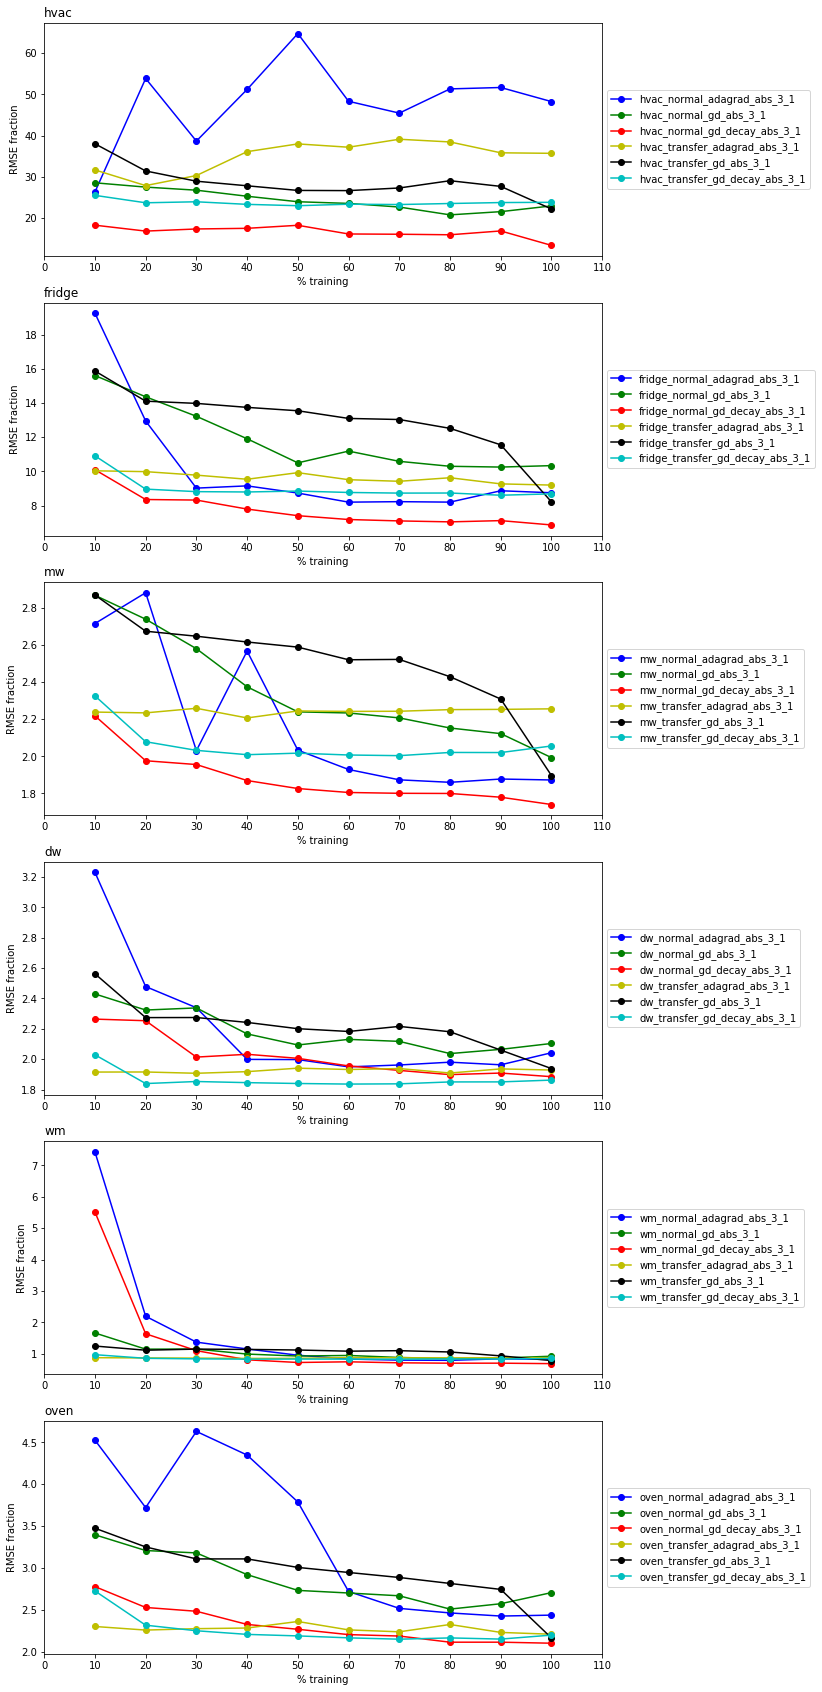

In [46]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(50, 100))
ax = axes.flatten()
count = 0

dfs = {}

index = [0, 10, 20, 30, 40, 50]
index = [x+2 for x in index]


for appliance in APPLIANCES_ORDER[1:]:
    dfs = {}
    num = 0
    
    for method in ['normal', 'transfer']:
        for algo in ['adagrad', 'gd', 'gd_decay']:
            for cost in ['abs', 'rel']:
                for a in [3]:
                    for lr in [0.01, 0.1, 1, 10, 100]:
                        dfs[num] = mean_out[method][algo][cost][a][lr][appliance + "_" +  method + "_" + algo + "_" + cost + "_" + str(a) + "_" + str(lr)]
                        num += 1
    
    df = pd.concat([dfs[index[0]], dfs[index[1]]], axis = 1)
    for i in range(2, len(index)):
        df = pd.concat([df, dfs[index[i]]], axis = 1)
    
    
#     df = pd.concat([dfs[3], dfs[33]], axis=1)
    pd.DataFrame(df).plot(ax=ax[count],figsize=(10, 30), marker='o', xlim=(0, 110), color=['b', 'g','r', 'y', 'k', 'c'])
    ax[count].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    ax[count].set_xlabel("% training");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_ylabel('RMSE fraction')
    ax[count].set_title(appliance, loc="left")
    count += 1
# plt.savefig("./analysis/0720/transfer_gd_decay_rel_3.pdf", bbox_inches="tight", dpi=300, format="pdf")

### -------------------------------------------------------------------------------------------------------------------------------
### Regularization exploration

## Normal learning with regularization term

In [64]:
import autograd.numpy as np
from numpy import linalg as LA
from autograd import multigrad

def cost_abs_reg(H, A, T, E_np_masked, case):
    la = 10
    HAT = multiply_case(H, A, T, case)
    mask = ~np.isnan(E_np_masked)
    error = (HAT - E_np_masked)[mask].flatten() + la * LA.norm(~np.isnan(H)) + la * LA.norm(~np.isnan(A)) + la * LA.norm(~np.isnan(T))
    return np.sqrt((error ** 2).mean())

def learn_HAT_reg(case, E_np_masked, a, b, num_iter=2000, lr=0.1, dis=False, cost_function='abs', H_known=None,
              A_known=None, T_known=None, random_seed=0, random_mul_constant=1,
              random_add_constant=0):
    np.random.seed(random_seed)
    if cost_function == 'abs':
        cost = cost_abs_reg
    else:
        cost = cost_rel
    mg = multigrad(cost, argnums=[0, 1, 2])

    params = {}
    params['M'], params['N'], params['O'] = E_np_masked.shape
    params['a'] = a
    params['b'] = b
    H_dim_chars = list(cases[case]['HA'].split(",")[0].strip())
    H_dim = tuple(params[x] for x in H_dim_chars)
    A_dim_chars = list(cases[case]['HA'].split(",")[1].split("-")[0].strip())
    A_dim = tuple(params[x] for x in A_dim_chars)
    T_dim_chars = list(cases[case]['HAT'].split(",")[1].split("-")[0].strip())
    T_dim = tuple(params[x] for x in T_dim_chars)
    H = np.random.rand(*H_dim)*random_mul_constant+random_add_constant

    A = np.random.rand(*A_dim)*random_mul_constant+random_add_constant
    T = np.random.rand(*T_dim)*random_mul_constant+random_add_constant

    # GD procedure
    for i in range(num_iter):
        del_h, del_a, del_t = mg(H, A, T, E_np_masked, case)
        H -= lr * del_h
        A -= lr * del_a
        T -= lr * del_t
        # Projection to known values
        if H_known is not None:
            H = set_known(H, H_known)
        if A_known is not None:
            A = set_known(A, A_known)
        if T_known is not None:
            T = set_known(T, T_known)
        # Projection to non-negative space
        H[H < 0] = 0
        A[A < 0] = 0
        T[T < 0] = 0
        if i % 500 == 0:
            if dis:
                print(cost(H, A, T, E_np_masked, case))
    return H, A, T